In [2]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# All timing are in micro seconds (us)

In [3]:
df = pd.read_csv("./results/oob_pw.csv")
df = df[df['m'] != 256]
df = df[(df['conf'] == "f16_m4") | (df['conf'] == "f16_m2")]
pd.options.display.max_rows = 90
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df.reset_index(inplace=True, drop = True)
df


,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
0,f16_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1.77%,1.29%,230.815411,1.162988,0.7600,34.0,25.0,1000.0,48.37500,300
1,f16_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,14.25%,10.36%,229.980151,9.337691,0.7600,37.0,27.0,1000.0,48.62500,300
2,f16_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,26.52%,19.28%,988.639196,17.377289,0.7600,42.0,33.0,1000.0,50.56250,300
3,f16_m4,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,31.51%,22.91%,2808.128993,20.647933,0.7600,47.0,36.0,980.0,50.81250,300
4,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,35.39%,25.74%,6147.174835,22.358068,0.7550,59.5,45.0,971.5,54.87500,300
5,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,38.77%,28.19%,44894.468784,24.491027,0.7500,59.0,44.0,959.5,56.37500,300
6,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,0.97%,0.71%,210.941633,1.272558,0.7600,33.0,24.0,1000.0,44.06250,300
7,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,7.33%,5.33%,223.553975,9.606108,0.7600,36.0,26.0,1000.0,46.37500,300
8,f16_m2,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,14.41%,10.48%,909.817219,18.882770,0.7600,42.0,32.0,1000.0,48.31250,300
9,f16_m2,3072,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,19.70%,14.33%,2245.309353,25.823639,0.7600,42.0,33.0,1000.0,50.06250,300


In [73]:
df_p100 = pd.read_csv("./results/matmul_gpu_p100.csv")
df_p100 = df_p100[df_p100['m'] != 256]
df_p100.reset_index(inplace=True, drop = True)
df_p100

,m,run,tflops,power
0,512,111.192862,2.414143,53.0125
1,1024,508.031845,4.227065,80.1250
2,2048,3032.156626,5.665891,132.0385
3,3072,9877.893925,5.869881,173.0130
4,4096,23039.038976,5.965481,180.9820
5,8192,179178.367456,6.136408,195.5115


In [49]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [78]:
df_inf = get_column_df_info(df, 'run')
df_inf.columns = ["GS bfloat16 M4", "GS bfloat16 M2"]
df_inf['Nvidia p100'] = df_p100['run'].values
df_inf

,GS bfloat16 M4,GS bfloat16 M2,Nvidia p100
512,230.815411,210.941633,111.192862
1024,229.980151,223.553975,508.031845
2048,988.639196,909.817219,3032.156626
3072,2808.128993,2245.309353,9877.893925
4096,6147.174835,4611.134529,23039.038976
8192,44894.468784,32638.672988,179178.367456


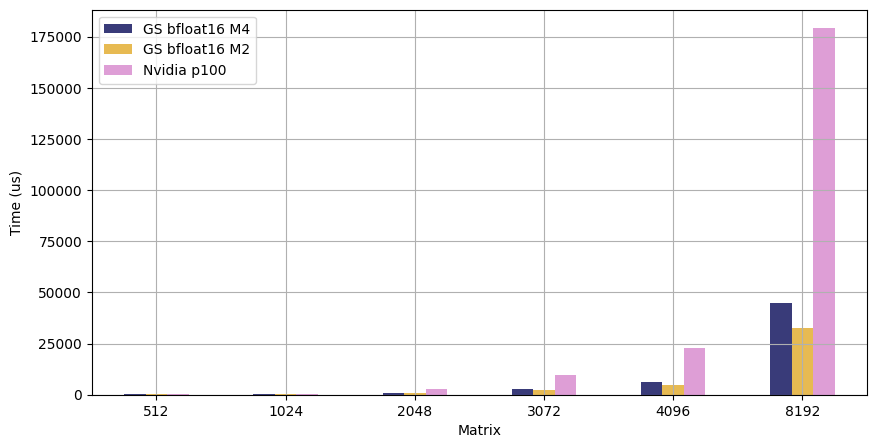

In [89]:
p = df_inf.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)
p.set_ylabel('Time (us)')
p.set_xlabel('Matrix')
plt.grid(True)

plt.show()

## GFLOPS

In [80]:
df_tflops = get_column_df_info(df, 'tflops')
df_tflops.columns = ["GS bfloat16 M4", "GS bfloat16 M2"]
df_tflops['Nvidia P100'] = df_p100['tflops'].values
df_tflops

,GS bfloat16 M4,GS bfloat16 M2,Nvidia P100
512,1.162988,1.272558,2.414143
1024,9.337691,9.606108,4.227065
2048,17.377289,18.882770,5.665891
3072,20.647933,25.823639,5.869881
4096,22.358068,29.805887,5.965481
8192,24.491027,33.687388,6.136408


In [81]:
def calculate_matrix_size(m, element_size=2):
    # Calculate the size in bytes
    size_in_bytes = m * m * element_size
    # Convert to megabytes
    size_in_megabytes = size_in_bytes / (1024 * 1024)
    return size_in_megabytes

# Example usage
m = 3072
matrix_size_mb = calculate_matrix_size(m)
print(f"The size of a {m}x{m} matrix is {matrix_size_mb} MB")

The size of a 3072x3072 matrix is 18.0 MB


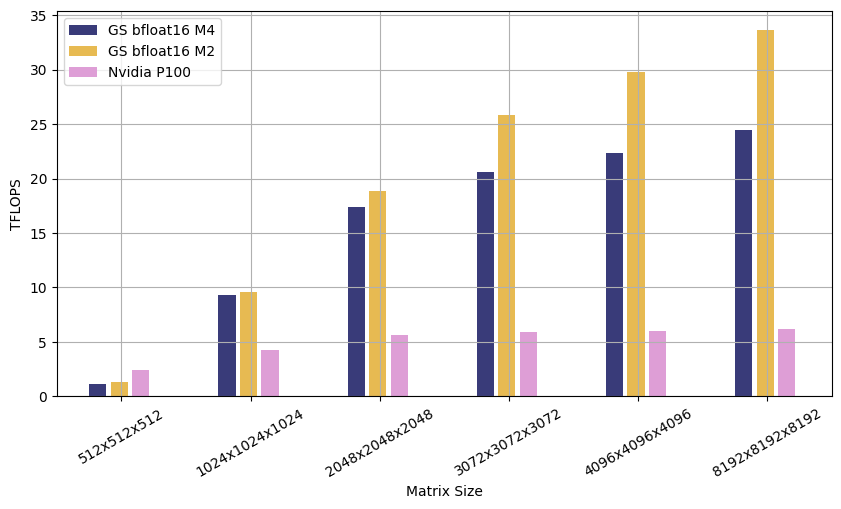

In [88]:
fig, ax = plt.subplots()
p = df_tflops.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0, ax=ax)
# Adjust the width of the bars and the spacing between them
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)

p.set_xticklabels([f"{m}x{m}x{m}" for m in df_tflops.index], rotation=30)
p.set_ylabel('TFLOPS')
plt.grid(True)

p.set_xlabel('Matrix Size')
plt.show()

## Power

In [83]:
df_power = get_column_df_info(df, 'power')
df_power.columns = ["GS bfloat16 M4", "GS bfloat16 M2"]
df_power['Nvidia P100'] = df_p100['power'].values
df_power

,GS bfloat16 M4,GS bfloat16 M2,Nvidia P100
512,25.0,24.0,53.0125
1024,27.0,26.0,80.1250
2048,33.0,32.0,132.0385
3072,36.0,33.0,173.0130
4096,45.0,44.0,180.9820
8192,44.0,44.0,195.5115


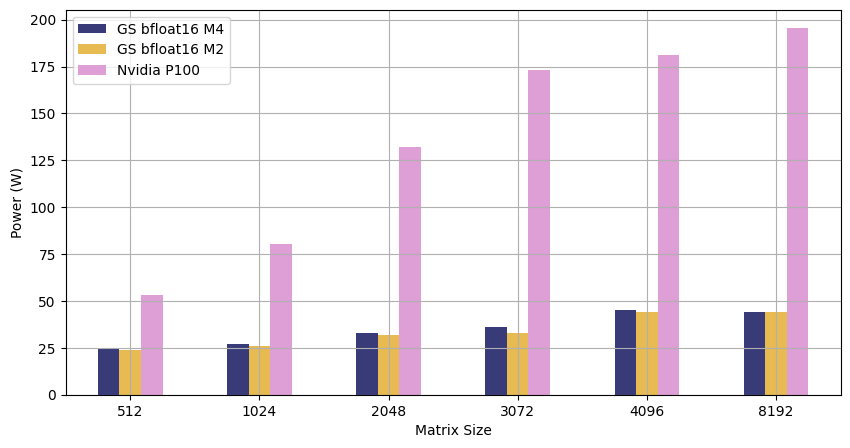

In [87]:
p = df_power.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0)
p.set_xlabel("Matrix Size")
p.set_ylabel("Power (W)")
plt.grid(True)

plt.show()

## GFLOPS per Watt

In [85]:
df_gflops_w = df_tflops / df_power 
df_gflops_w

,GS bfloat16 M4,GS bfloat16 M2,Nvidia P100
512,0.046520,0.053023,0.045539
1024,0.345840,0.369466,0.052756
2048,0.526585,0.590087,0.042911
3072,0.573554,0.782535,0.033927
4096,0.496846,0.677407,0.032962
8192,0.556614,0.765622,0.031386


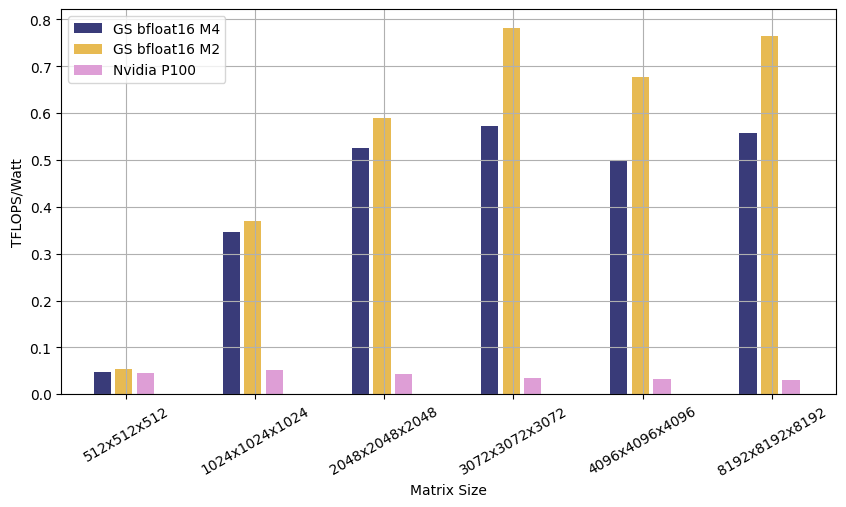

In [86]:
fig, ax = plt.subplots()
p = df_gflops_w.plot(kind='bar', figsize=(10, 5), colormap="tab20b", rot=0, ax=ax)

# for container in ax.containers:
    # labels = [f'{v.get_height():.2f}' for v in container]
    # ax.bar_label(container, labels=labels, padding=5, label_type='edge', fmt='%.2f', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    # ax.bar_label(container, padding=5, label_type='edge', fmt='%.2f')

# Adjust the width of the bars and the spacing between them
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)

p.legend(loc='upper left')
p.set_ylabel('TFLOPS/Watt')
p.set_xticklabels([f"{m}x{m}x{m}" for m in df_gflops_w.index], rotation=30)
p.set_xlabel('Matrix Size')
plt.grid(True)

plt.show()


## TFLOPs per Dollar

In [72]:
conf = 'bfloat16_m4'
gs_cost = 599
df_gflops_d = df_tflops * 1e3 / gs_cost 
df_gflops_d

,GS bfloat16 M4,GS bfloat16 M2,Nvidia P100
512,1.941549,2.124471,4.030289
1024,15.588800,16.036908,7.056870
2048,29.010499,31.523823,9.458917
3072,34.470672,43.111251,9.799467
4096,37.325656,49.759410,9.959067
8192,40.886522,56.239378,10.244421
